# In class project for Monday, November 23 (due Wednesday 12/2)

#### Set-up

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Optical Character Recognition

As a prototypical image analysis and categorization task we look at identifying the correct digit (0..9) in digital images of handwritten digits. For this project we'll use the digits dataset built into sklearn.

### sklearn digits dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

#### What is type of digits?

In [3]:
type(digits)

sklearn.utils.Bunch

A Bunch object is a custom version of a pandas object (https://pandas.pydata.org/docs/user_guide/index.html)
At a basic level a Bunch object is just a special tpye of dictionary and can be used as such.

In [4]:
isinstance(digits, dict)

True

In [5]:
for d in digits:
    print(d,type(digits[d]))

data <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
frame <class 'NoneType'>
feature_names <class 'list'>
target_names <class 'numpy.ndarray'>
images <class 'numpy.ndarray'>
DESCR <class 'str'>


In [6]:
print(digits['DESCR'])
#print(digits['DESCR'][0:500])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
d1_data  = (digits['data'][0])
d1_image = (digits['images'][0])
d1_target = (digits['target_names'][0])

In [8]:
print(digits['images'][0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


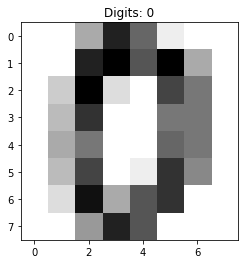

In [9]:
    plt.imshow(d1_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Digits: {d1_target}')
    plt.show()

### a) Describe and visualize the data, for example how many samples, feature and target  dimensionality?  Visualize some of the digits (<=100). 


The properties of digits are: data, target, frame, feature_names, target_names, images, and DESCR.

The total number of samples is 1797. 

The number of features for a digits is: 

(1797, 8, 8); Since it is in a 8 x 8 orientation, then there is a total of 64 features per digit. 

Looking at the feature names: 

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_

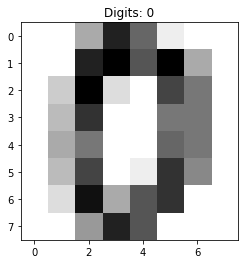

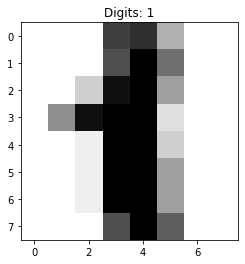

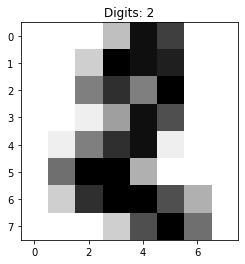

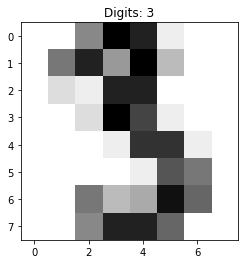

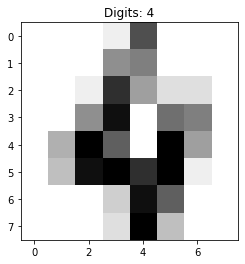

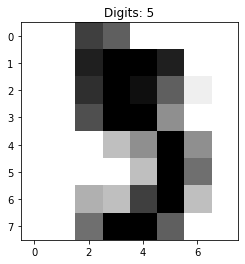

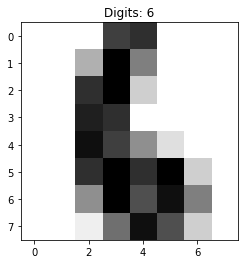

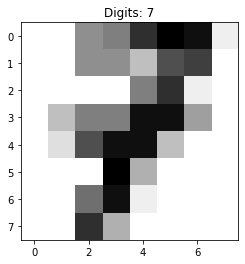

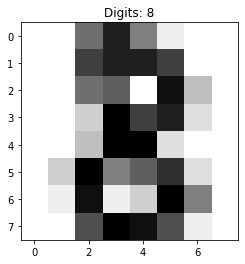

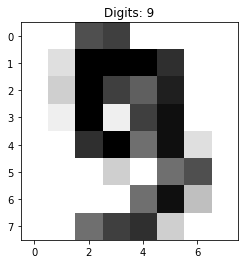

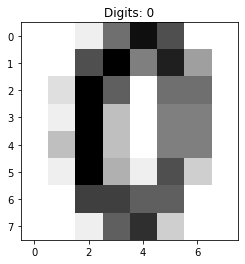

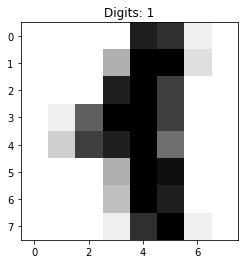

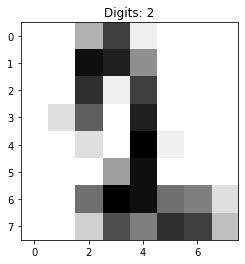

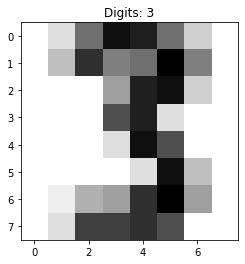

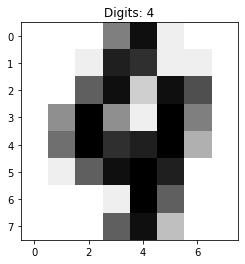

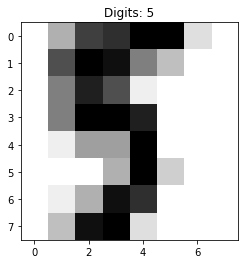

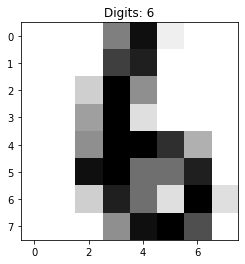

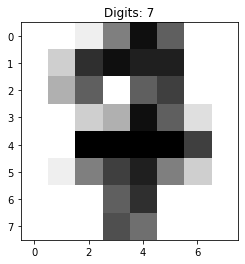

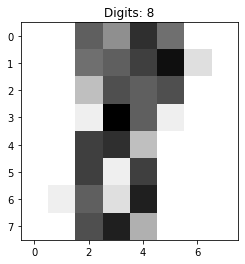

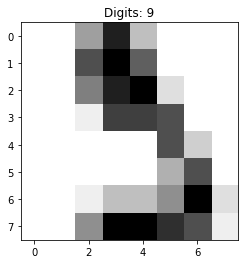

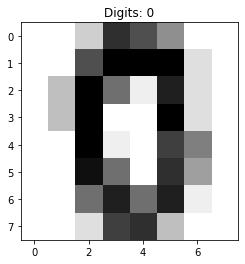

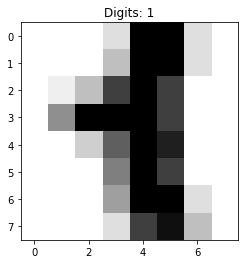

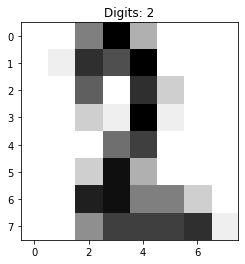

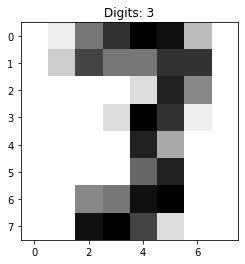

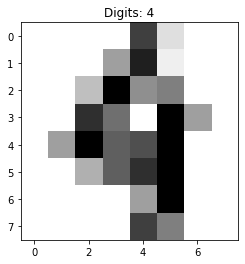

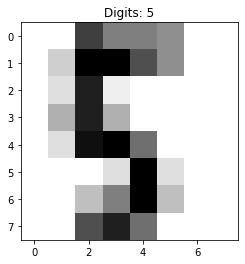

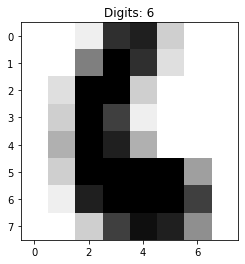

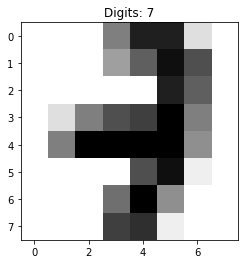

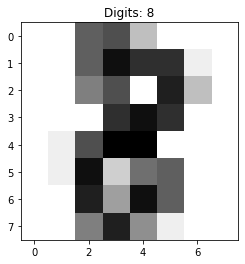

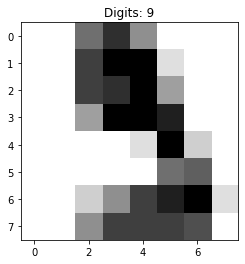

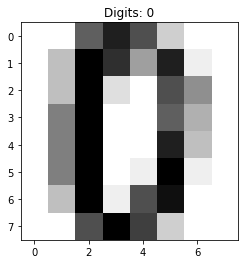

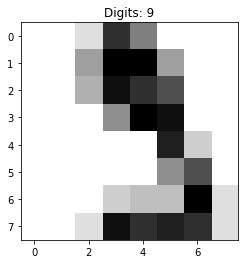

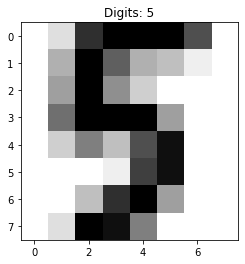

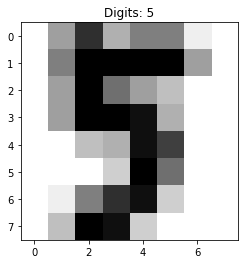

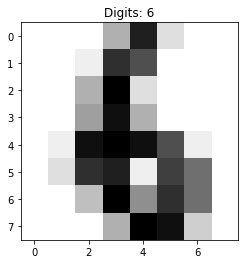

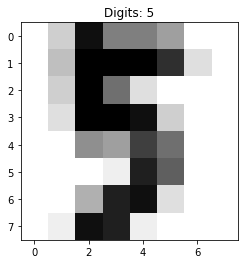

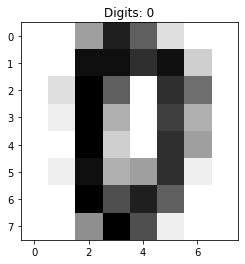

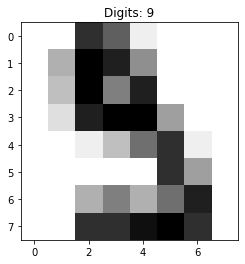

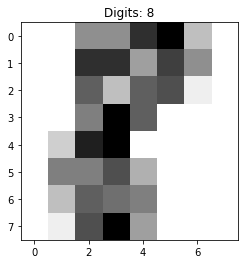

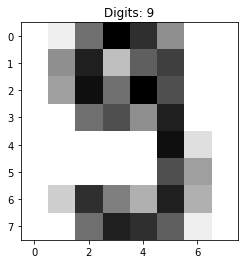

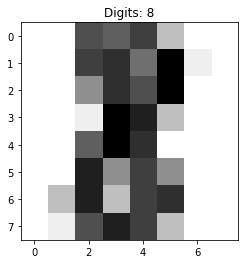

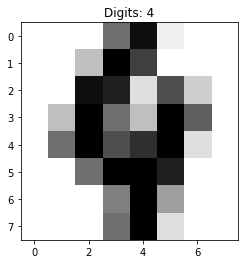

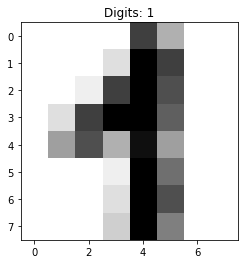

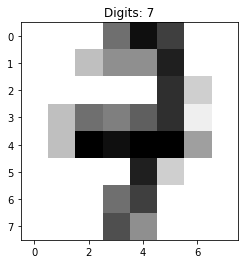

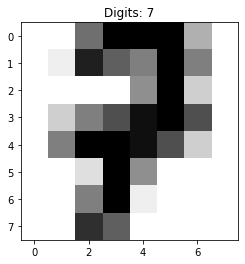

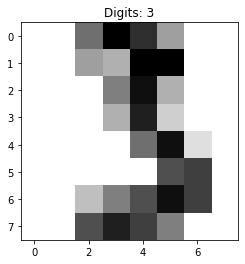

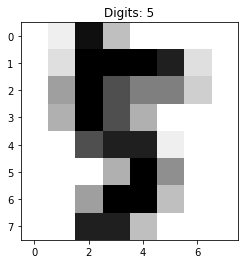

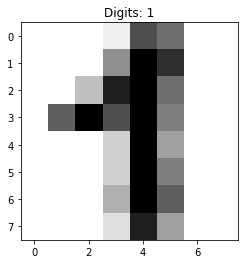

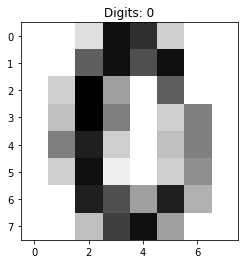

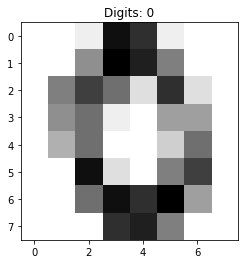

In [101]:
# for d in digits: 
#     print(d)

d_data = digits['data']
d_target = digits['target']
d_frame = digits['frame']
d_fn = digits['feature_names']
d_tn = digits['target_names']
d_images = digits['images']

print(f'''
The properties of digits are: data, target, frame, feature_names, target_names, images, and DESCR.

The total number of samples is {len(d_data)}. 

The number of features for a digits is: 

{d_images.shape}; Since it is in a 8 x 8 orientation, then there is a total of {d_images.shape[1] * d_images.shape[2]} features per digit. 

Looking at the feature names: 

{d_fn}

, they appear to be in numerated pixels starting from 00 to 77 which supports the value of 64 features. 

The target dimensionality is therefore 64 and the feature dimensionality is 3 (x and y component + intensity value). 

Looking at the image property: 

{d_images[0]}

The image properties appears to be containing the pixels needed to generate the digits, with the value 0 being white space and any other values being a shade of black or in better terms, the higher the value, the darker the pixel. 

Visualizing first 50 digits: 
''')

for i in np.arange(0, 50): 
    plt.figure()
    plt.imshow(d_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Digits: {d_target[i]}')
    plt.show()


### b) How useful is it to graph the dependency of the target on each feature or a pair of features?

Pick 2 features (pixels) and plot in two dimensions. Can you learn anything?

Answer: It might be quite useful to graph the dependency of the target on each feature or a pair of features. In this case, I plotted feature 'pixel_2_3' and 'pixel_3_4' against each other and there seem to be a clear slight dependence with one another though not to a large extent. If I were to plot this for the rest of the combination of features, it may be possible to determine a small subset of features that contains every bit of information that is needed to determine the target. 

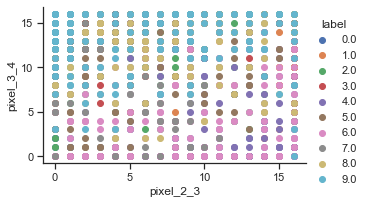

In [132]:
import pandas as pd 
import seaborn 
seaborn.set(style = 'ticks')

digits_data = digits.data
digits_label = digits.target 
labels = np.reshape(digits_label, (1797,1)) # To concatenate with with the data to create a data frame 
final_digits_data = np.concatenate([digits_data, labels], axis = 1) # Creating dataframe that has both the data and the respective labels 

digits_dataset = pd.DataFrame(final_digits_data) # Representing data in a table format 
features = digits.feature_names
features_label = np.append(features, 'label')
digits_dataset.columns = features_label # combining features with the dataframe to get a complete datasets with data, features label as well as target label 

fg = seaborn.FacetGrid(data = digits_dataset, hue = 'label', aspect = 1.5)
fg.map(plt.scatter, 'pixel_2_3', 'pixel_3_4').add_legend()
plt.show()



### c) Apply PCA to the digits data set. Keep two dimensions and create a plot. What if anything can you learn from your result?

## Principal Component Analysis (PCA)

* http://scikit-learn.org/stable/modules/decomposition.html
* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


In [139]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

x = digits_dataset.loc[:, features].values 
x = StandardScaler().fit_transform(x) # normalizing the features 
#print(x.shape)
#print(np.mean(x), np.std(x))
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
normalized_digits = pd.DataFrame(x, columns = feat_cols)
#print(normalized_digits.tail())

pca_digits = PCA(n_components = 2) # we want it to get down to 2 dimensions
principalComponents_breast = pca_digits.fit_transform(x) 

(1797, 64)
8.649483775599439e-19 0.9762812094883324
      feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
1792       0.0 -0.335016 -0.253452 -0.432200  0.268751  0.038508 -0.409724   
1793       0.0 -0.335016  0.167290  0.980343  0.268751  0.921145 -0.108958   
1794       0.0 -0.335016 -0.884566 -0.196776  0.735366 -0.844129 -0.409724   
1795       0.0 -0.335016 -0.674195 -0.432200 -1.131092 -1.020657 -0.409724   
1796       0.0 -0.335016  1.008775  0.509495 -0.897785 -0.844129 -0.409724   

      feature7  feature8  feature9  ...  feature54  feature55  feature56  \
1792 -0.125023 -0.059078 -0.311047  ...   0.055897  -0.209785  -0.023596   
1793 -0.125023 -0.059078 -0.624009  ...  -0.554103  -0.209785  -0.023596   
1794 -0.125023 -0.059078 -0.624009  ...  -0.757436  -0.209785  -0.023596   
1795 -0.125023 -0.059078 -0.624009  ...  -0.350769  -0.209785  -0.023596   
1796 -0.125023 -0.059078  0.001916  ...   0.869229  -0.209785  -0.023596   

      feature57  featu

### d) Classify the digit images with a support vector machine

## Support vector machines (SVM)

* https://scikit-learn.org/stable/modules/svm.html

## Model evaluation and scoring

* https://scikit-learn.org/stable/modules/model_evaluation.html

## Confusion matrix

* https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

#### Tasks:
1. Learn about SVMs in sklearn. What parameters does this method take?
1. Split your data into a training set and test set.
1. Think about how to report accuracy for your model? Overall accuracy? How do the concepts of true negatives, false positives, false negatives and true positives apply to this problem? What is a confusion matrix?
1. How accurate is your learning model? How does accuracy depend on the parameters of the SVM?


### e) Classify the digit images with a random forest model

## Random forests

* https://scikit-learn.org/stable/modules/ensemble.html#forest

#### Tasks:
1. Learn about Random forests in sklearn. What parameters does this method take?
1. Split your data into a training set and test set.
1. Think about how to report accuracy for your model? Overall accuracy? How do the concepts of true negatives, false positives, false negatives and true positives apply to this problem? What is a confusion matrix?
1. How accurate is your learning model? How does accuracy depend on the parameters of the Random forests?
